In [12]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from sklearn.impute import KNNImputer
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_chennai = pd.read_csv("../data/rawdata/Chennai.csv")
df_delhi = pd.read_csv("../data/rawdata/Delhi.csv")
df_Koonimedu = pd.read_csv("../data/rawdata/Koonimedu.csv")
df_mawlynnong = pd.read_csv("../data/rawdata/Mawlynnong.csv")

In [5]:
missing_counts = df_chennai.isnull().sum()
missing_percent = (missing_counts / len(df_chennai)) * 100

print("\nMissing Data Summary:")
print(pd.DataFrame({"Missing Values": missing_counts, "Percentage (%)": missing_percent}).sort_values(by="Percentage (%)", ascending=False))


Missing Data Summary:
                          Missing Values  Percentage (%)
time                                   0             0.0
pm10 (μg/m³)                           0             0.0
pm2_5 (μg/m³)                          0             0.0
carbon_monoxide (μg/m³)                0             0.0
nitrogen_dioxide (μg/m³)               0             0.0
sulphur_dioxide (μg/m³)                0             0.0
ozone (μg/m³)                          0             0.0


In [6]:
missing_counts = df_mawlynnong.isnull().sum()
missing_percent = (missing_counts / len(df_mawlynnong)) * 100

print("\nMissing Data Summary:")
print(pd.DataFrame({"Missing Values": missing_counts, "Percentage (%)": missing_percent}).sort_values(by="Percentage (%)", ascending=False))


Missing Data Summary:
                          Missing Values  Percentage (%)
time                                   0             0.0
pm10 (μg/m³)                           0             0.0
pm2_5 (μg/m³)                          0             0.0
carbon_monoxide (μg/m³)                0             0.0
nitrogen_dioxide (μg/m³)               0             0.0
sulphur_dioxide (μg/m³)                0             0.0
ozone (μg/m³)                          0             0.0


In [7]:
missing_counts = df_delhi.isnull().sum()
missing_percent = (missing_counts / len(df_delhi)) * 100

print("\nMissing Data Summary:")
print(pd.DataFrame({"Missing Values": missing_counts, "Percentage (%)": missing_percent}).sort_values(by="Percentage (%)", ascending=False))


Missing Data Summary:
                          Missing Values  Percentage (%)
time                                   0             0.0
pm10 (μg/m³)                           0             0.0
pm2_5 (μg/m³)                          0             0.0
carbon_monoxide (μg/m³)                0             0.0
nitrogen_dioxide (μg/m³)               0             0.0
sulphur_dioxide (μg/m³)                0             0.0
ozone (μg/m³)                          0             0.0


In [8]:
missing_counts = df_Koonimedu.isnull().sum()
missing_percent = (missing_counts / len(df_Koonimedu)) * 100

print("\nMissing Data Summary:")
print(pd.DataFrame({"Missing Values": missing_counts, "Percentage (%)": missing_percent}).sort_values(by="Percentage (%)", ascending=False))


Missing Data Summary:
                          Missing Values  Percentage (%)
time                                   0             0.0
pm10 (μg/m³)                           0             0.0
pm2_5 (μg/m³)                          0             0.0
carbon_monoxide (μg/m³)                0             0.0
nitrogen_dioxide (μg/m³)               0             0.0
sulphur_dioxide (μg/m³)                0             0.0
ozone (μg/m³)                          0             0.0


In [9]:
def detect_outliers(df):
    outlier_info = {}
    for col in df.columns[1:-2]:  # Exclude time, location, urban_rural
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_info[col] = len(outliers)

    outlier_df = pd.DataFrame(list(outlier_info.items()), columns=["Pollutant", "Outlier Count"])
    print("\nOutlier Summary:\n", outlier_df.sort_values(by="Outlier Count", ascending=False))

In [10]:
def visualize_outliers(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df.iloc[:, 1:-2])  # Exclude time, location, urban_rural
    plt.xticks(rotation=45)
    plt.title("Boxplot of Pollutant Concentrations (Before Outlier Removal)")
    plt.show()


Outlier Summary:
                   Pollutant  Outlier Count
3  nitrogen_dioxide (μg/m³)           1077
2   carbon_monoxide (μg/m³)            773
0              pm10 (μg/m³)            551
1             pm2_5 (μg/m³)            482


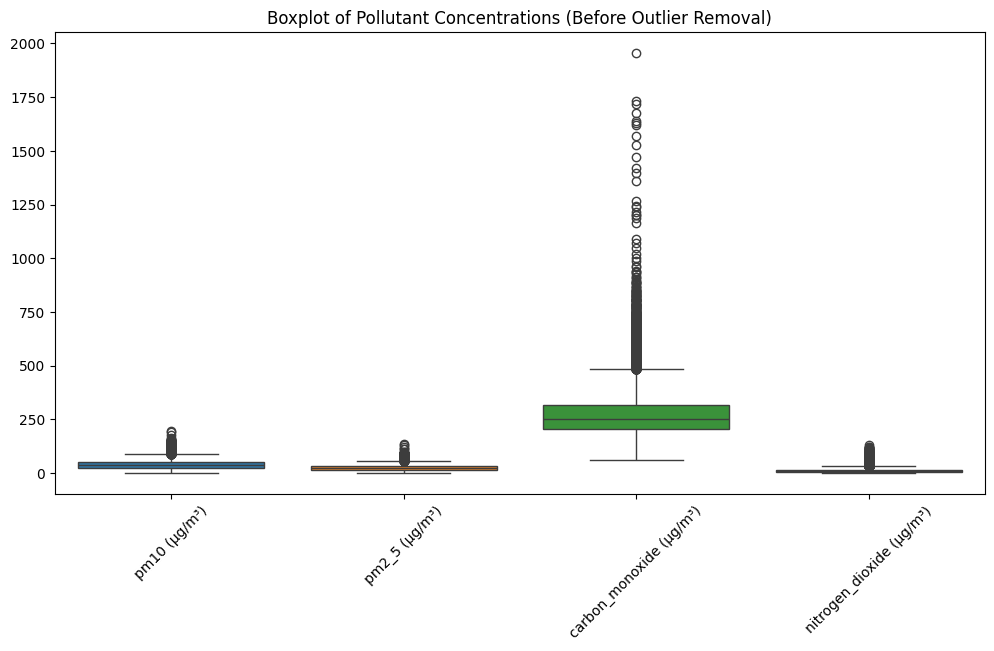


Outlier Summary:
                   Pollutant  Outlier Count
2   carbon_monoxide (μg/m³)           1285
1             pm2_5 (μg/m³)           1038
0              pm10 (μg/m³)            697
3  nitrogen_dioxide (μg/m³)            534


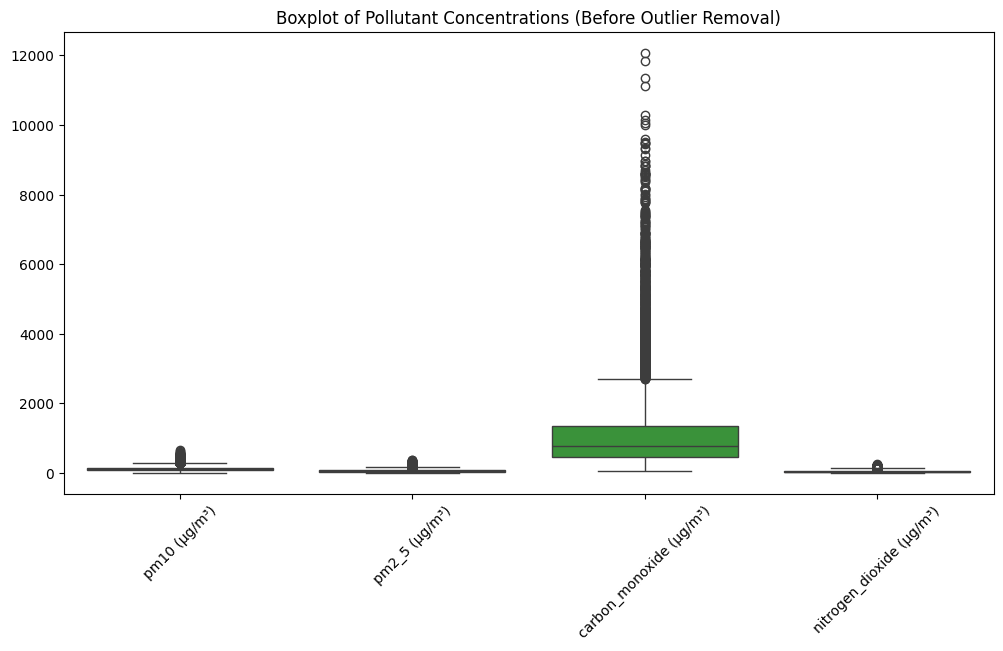


Outlier Summary:
                   Pollutant  Outlier Count
3  nitrogen_dioxide (μg/m³)           1161
2   carbon_monoxide (μg/m³)            830
0              pm10 (μg/m³)            618
1             pm2_5 (μg/m³)            506


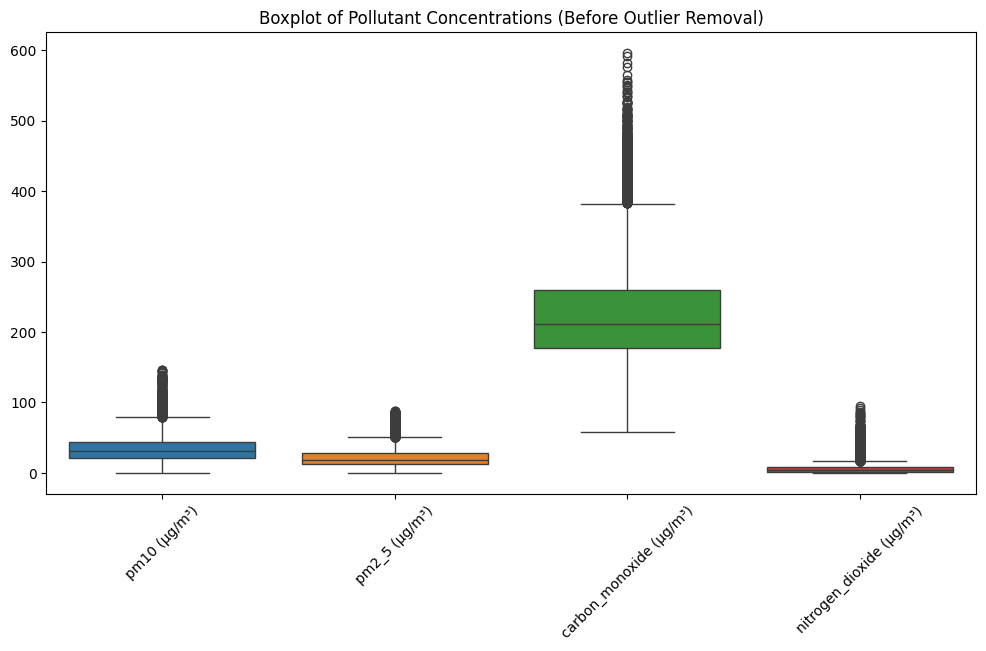


Outlier Summary:
                   Pollutant  Outlier Count
3  nitrogen_dioxide (μg/m³)           1719
2   carbon_monoxide (μg/m³)            796
1             pm2_5 (μg/m³)            290
0              pm10 (μg/m³)            256


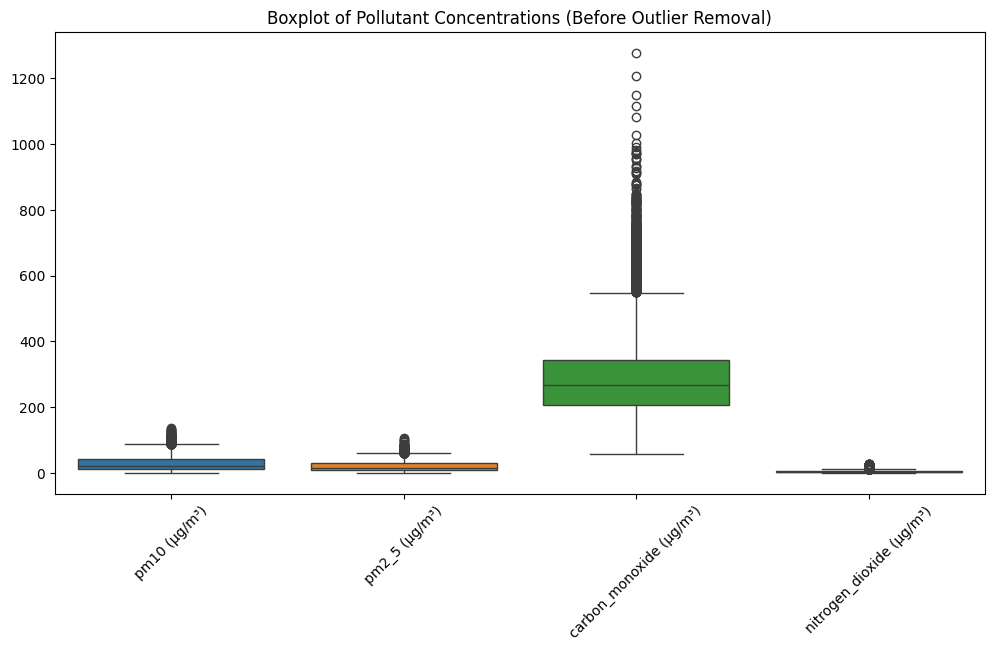

In [13]:
for df in [df_chennai, df_delhi, df_Koonimedu, df_mawlynnong]:
    detect_outliers(df)
    visualize_outliers(df)

In [14]:
def load_data(file_path):
    """Load dataset and parse datetime."""
    df = pd.read_csv(file_path, parse_dates=['time'])
    df.sort_values(by='time', inplace=True)
    return df

In [15]:
def handle_missing_values(df):
    """Fill missing values using KNN imputation."""
    imputer = KNNImputer(n_neighbors=3)
    df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])
    return df
    #no missing values in the dataset

In [16]:
def remove_outliers(df):
    """Remove outliers using IQR method."""
    for col in df.columns[1:]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
    return df

In [17]:
def smooth_data(df):
    """Apply Savitzky-Golay filter for smoothing."""
    for col in df.columns[1:]:
        df[col] = savgol_filter(df[col], window_length=5, polyorder=2, mode='nearest')
    return df

In [19]:
def process_and_save(df, file_name, output_dir='../data/cleaneddata/'):
    """Process each dataset and save cleaned version."""
    df = remove_outliers(df)
    df = handle_missing_values(df)
    df = smooth_data(df)
    output_path = os.path.join(output_dir, file_name)
    df.to_csv(output_path, index=False)
    print(f"Cleaned data saved: {output_path}")

# Example usage:
process_and_save(df_chennai, 'Chennai.csv')
process_and_save(df_delhi, 'Delhi.csv')
process_and_save(df_Koonimedu, 'Koonimedu.csv')
process_and_save(df_mawlynnong, 'Mawlynnong.csv')


Cleaned data saved: ../data/cleaned/Chennai.csv
Cleaned data saved: ../data/cleaned/Delhi.csv
Cleaned data saved: ../data/cleaned/Koonimedu.csv
Cleaned data saved: ../data/cleaned/Mawlynnong.csv
